This notebook shows experiment results with the RBS system

# comparing different market conditions

In [1]:
# Import a set of default parameters
from IPython.display import display
from model.utility.default_parameters import default_params1 as params
# Import a default initial state
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)
# params["demand_factor"] = [0.07]#[0.5,0.1]#
# params["supply_factor"] = [-.07]#[-.01,-0.1]#

In [6]:
from itertools import product

# Change the demand and supply factors to set up different market conditions
demand_sweep = [0.1,0.07,0.01] # demand should always be positive
supply_sweep = [-.07] # supply should always be positive
sweeps = list(product(*[demand_sweep, supply_sweep]))

demand_sweep = [x[0] for x in sweeps]
supply_sweep = [x[1] for x in sweeps]
params["demand_factor"] = demand_sweep
params["supply_factor"] = supply_sweep

## Run Experiment

You can set two parameters for the simulation model at this phase. The number of monte carlo runs (number_runs) and the number of timesteps for each run (number_steps). Then you load the experiment with load_config, get raw output from running the experiment, and finally apply to post-processing function to parse the data into a smaller and enhanced dataframe.

In [7]:
from model.run import load_config, run, post_processing

# Set the params for runs and timesteps
number_runs = 2
number_steps = 100

# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = run(exp)

# Parse the raw data
df = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 19, 6, 63)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 19, 6, 63)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 18.62s


## Visualization

There are functions to easily visualize some of the results of the cadCAD runs. Below we will show some graphics from the monte carlo simulations.

In [13]:
from model.utility.visualization import plot_all_sims,plot_grouped_variables_average,plot_multivars_grouped_average


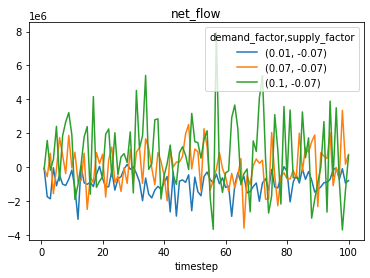

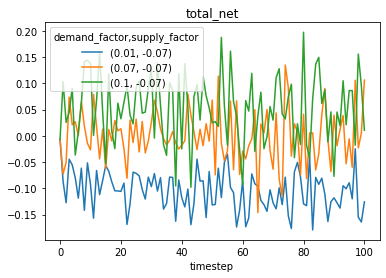

In [14]:

plot_grouped_variables_average([ "net_flow","total_net"],
                               ["demand_factor", "supply_factor"],
                               df)

We can see from above that when the demand factor is smaller than supply (in terms of absolute value), the total netflow is negative meaning more people withdrawing from liquidity pool; when demand factor is bigger, total netflow is positive. When two values equal, the total netflow oscilates around 0.

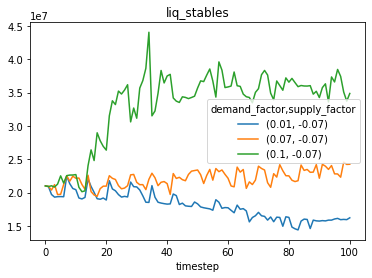

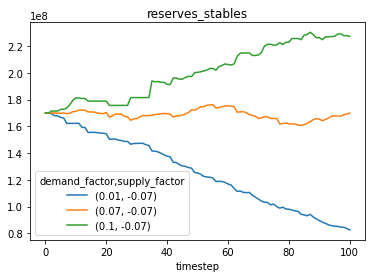

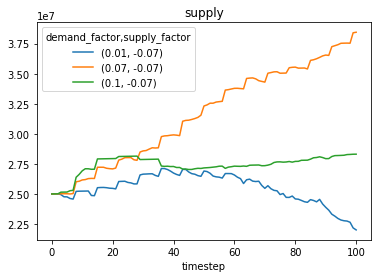

In [15]:

plot_grouped_variables_average(['liq_stables',"reserves_stables","supply",],
                               ["demand_factor", "supply_factor"],
                               df)
                               

Reserve increase when demand bigger than supply and decrease otherwise, which makes sense.

The liquidity decreases when less demand, increases when there's more demand than supply, yet stablizes (potentially because of RBS: liquidity is being bought into the reserves?)

The supply is not changing much in either bearish or bullish market, compared to when the demand and supply are equal, where it keeps increasing (WHY?)

/home/zhiwei/Documents/blockscience/OlympusRBS/model/utility/visualization.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


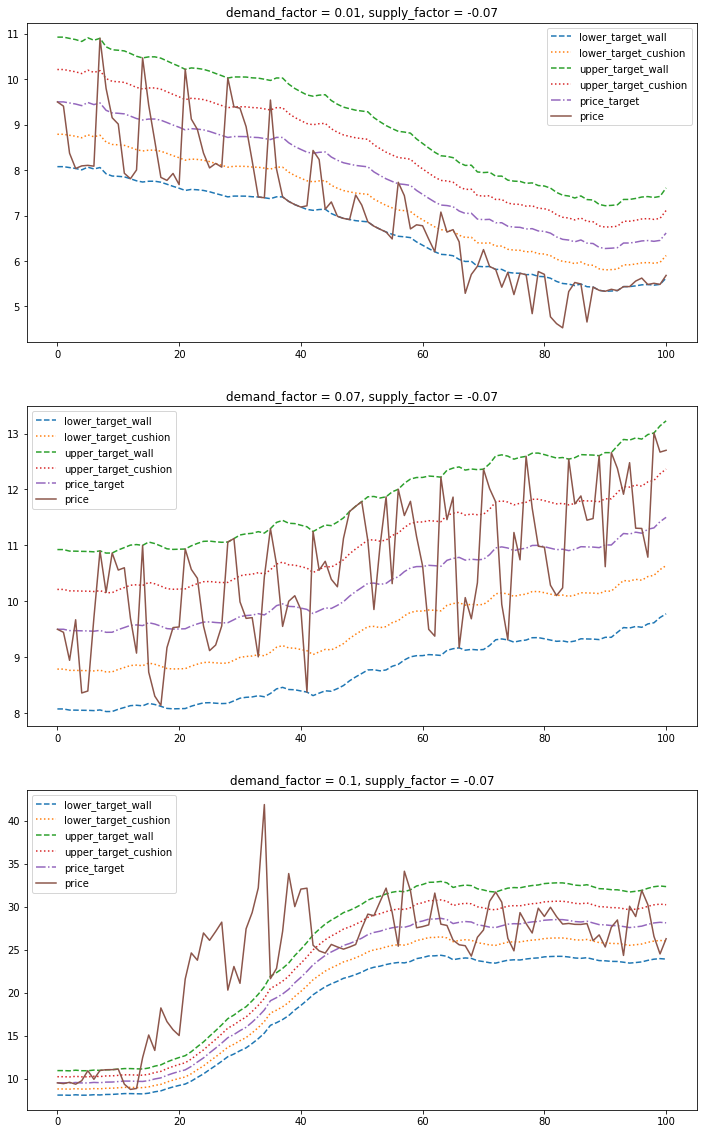

In [9]:

grouping_variables = ["demand_factor", "supply_factor"]
var_list = [ "lower_target_wall","lower_target_cushion",
            "upper_target_wall","upper_target_cushion",
            "price_target","price",
        #"natural_price"
        ]
linestyles = ['--',':','--',':','-.','-']
plot_multivars_grouped_average(var_list,grouping_variables,df,linestyles)

From above we can see the different scenarios when the RBS is able to keep the price within the desired price walls and when it can't. Even though when it deviates from the price target, it can also return back to the desired range (also because the desired range adjusts with the price target)

/home/zhiwei/Documents/blockscience/OlympusRBS/model/utility/visualization.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


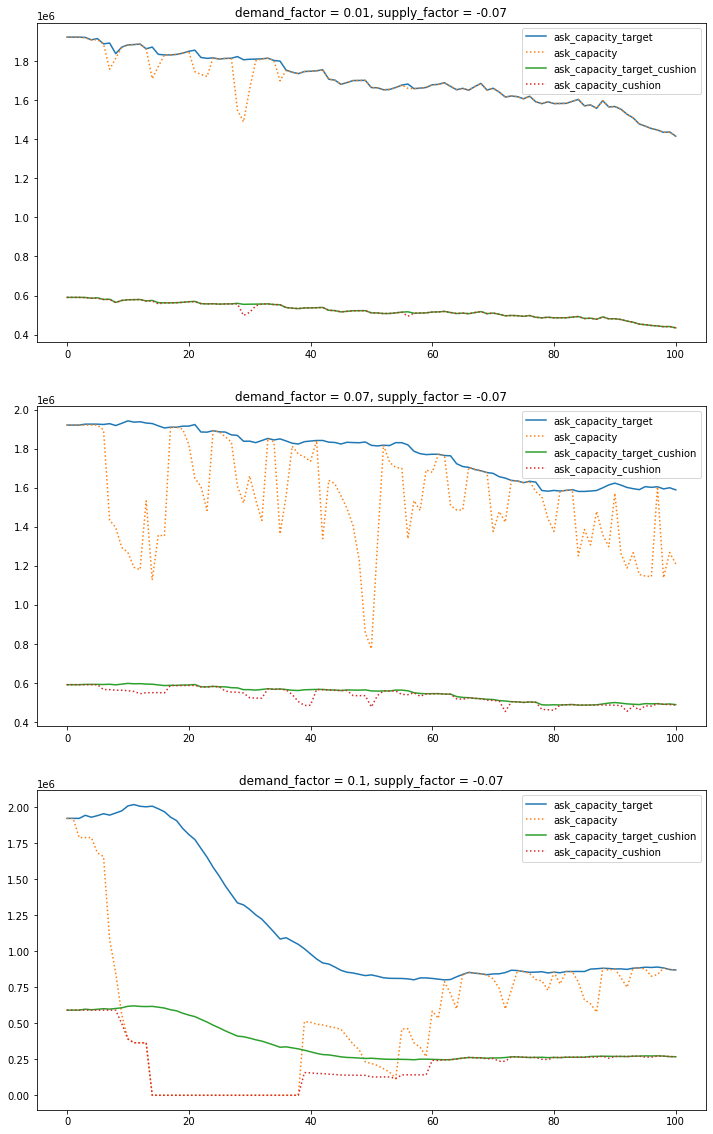

In [35]:
grouping_variables = ["demand_factor", "supply_factor"]
var_list = [ "ask_capacity_target","ask_capacity",
            "ask_capacity_target_cushion","ask_capacity_cushion",
        ]
linestyles = ['-',':','-',':']
plot_multivars_grouped_average(var_list,grouping_variables,df,linestyles)

/home/zhiwei/Documents/blockscience/OlympusRBS/model/utility/visualization.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


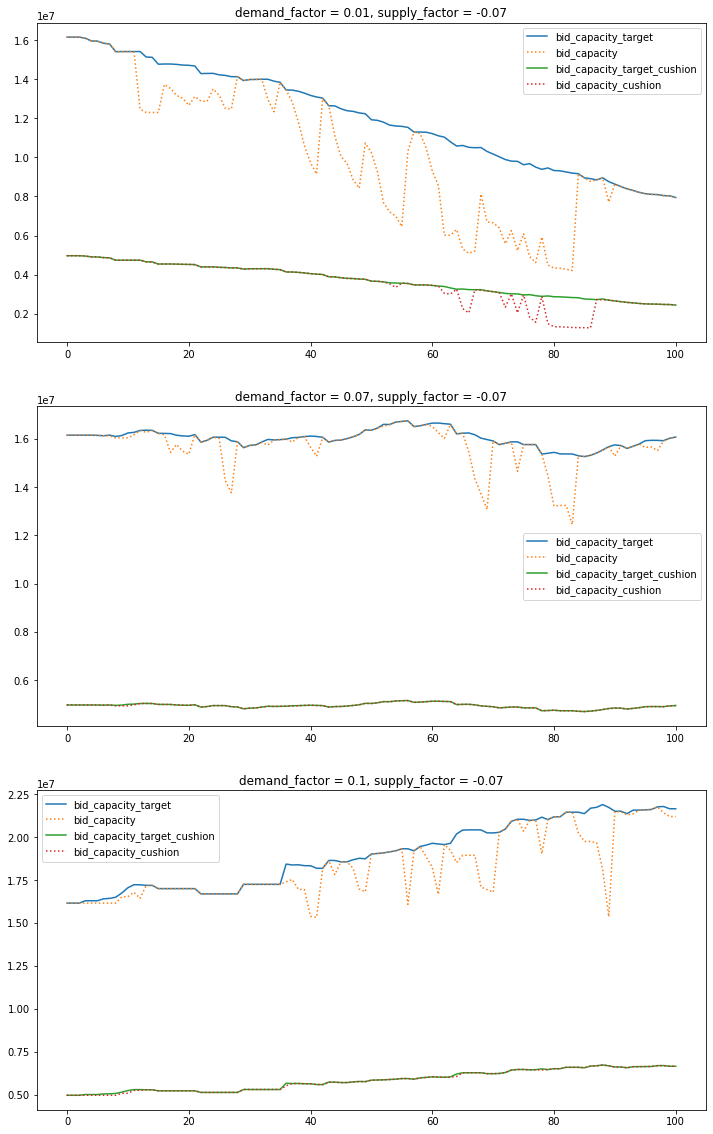

In [36]:
grouping_variables = ["demand_factor", "supply_factor"]
var_list = [ "bid_capacity_target","bid_capacity",
            "bid_capacity_target_cushion","bid_capacity_cushion",
        ]
linestyles = ['-',':','-',':']
plot_multivars_grouped_average(var_list,grouping_variables,df,linestyles)

overall the capacity variables follow their targets well. extreme deviation happens for the ask capacity when the supply is less than demand (bullish market).

[0.14375]


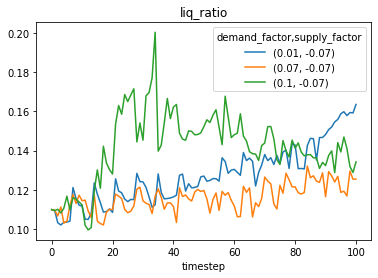

In [32]:

fig=plot_grouped_variables_average(['liq_ratio'],
                               ["demand_factor", "supply_factor"],df)
print(params['max_liq_ratio'])


Seems like it's easier to reach target liquidity/treasury ratio in a bearish market (so that more reserves flow out to the market). in a neutral market it never reaches the liq_ratio.